In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

countys = gpd.read_file("../data/shp/county/COUNTY_MOI_1140318.shp").to_crs(epsg=4326)
towns = gpd.read_file("../data/shp/town/TOWN_MOI_1140318.shp").to_crs(epsg=4326)
villages = gpd.read_file("../data/shp/village/VILLAGE_NLSC_1140825.shp").to_crs(epsg=4326)


In [3]:
# remove 東沙群島 & 太平島
def is_dongsha(geom):
    c = geom.centroid
    return (20.3 <= c.y <= 20.6) and (116.3 <= c.x <= 116.7)

def is_taiping(geom):
    c = geom.centroid
    return (9.5 <= c.y <= 11.0) and (113.5 <= c.x <= 115.0)

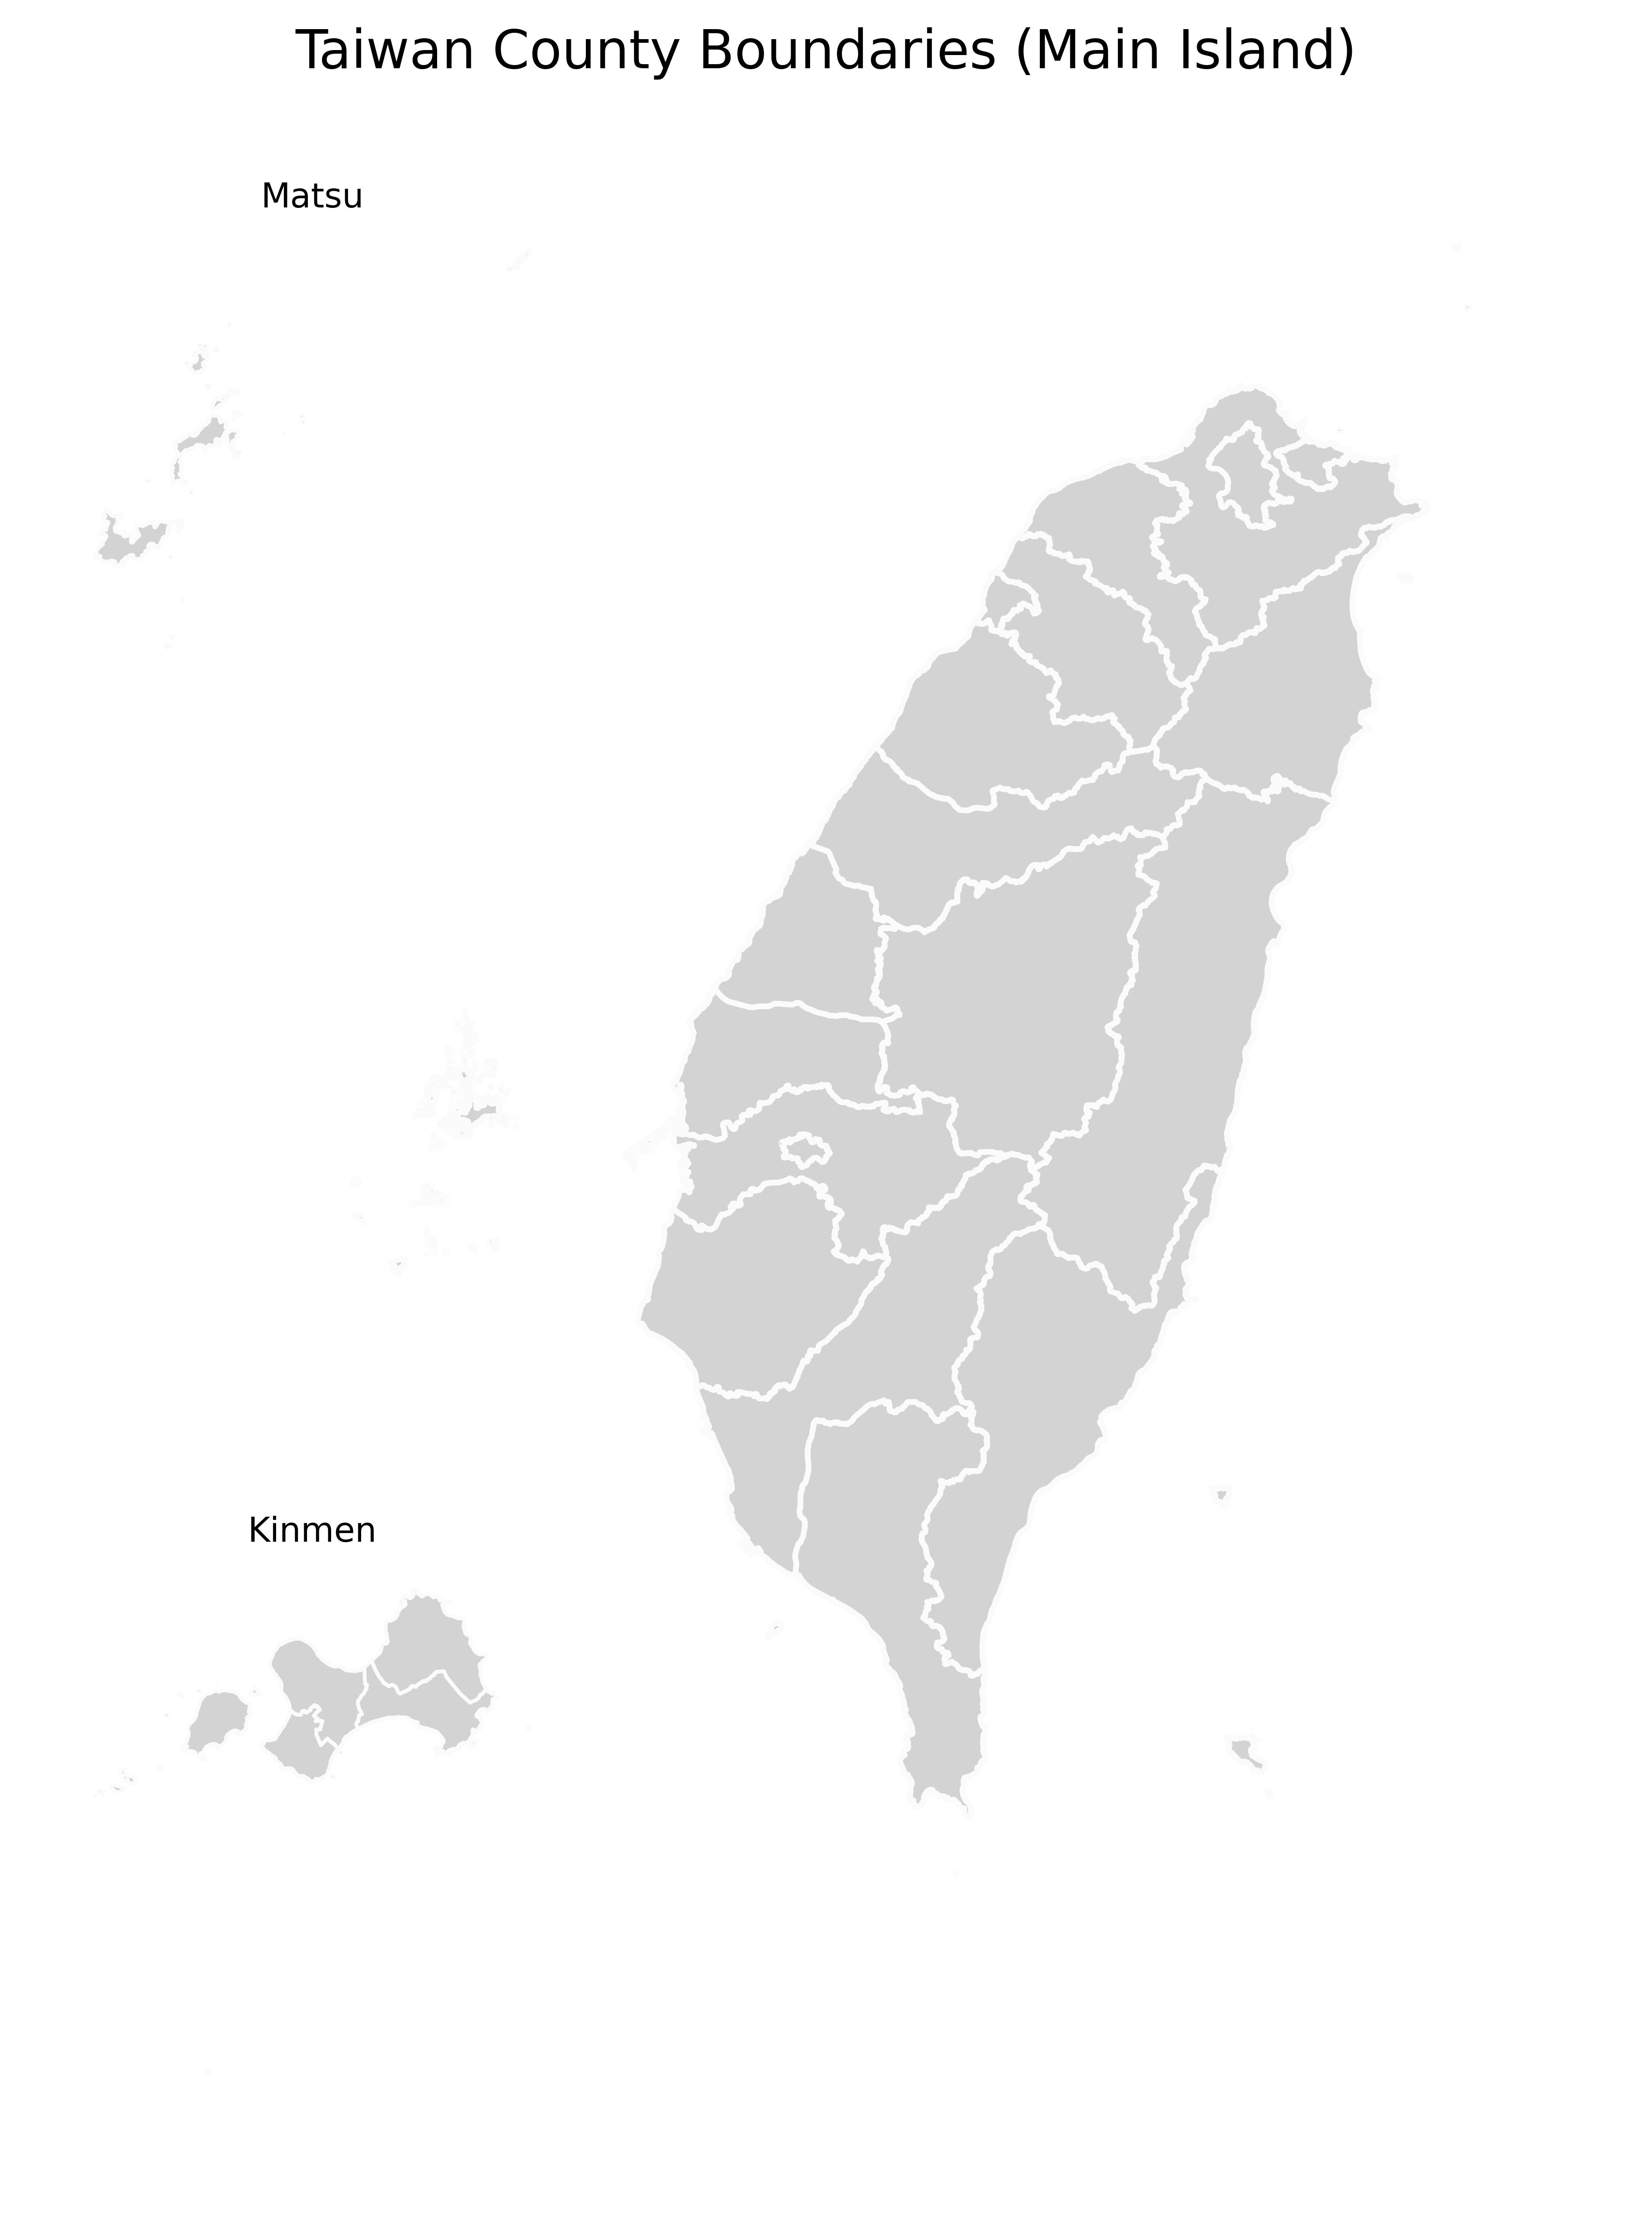

In [4]:
# county aspect
mainland_countys = countys[~countys["COUNTYNAME"].isin(["金門縣", "連江縣"])]
kinmen = towns[towns["COUNTYNAME"] == "金門縣"]
kinmen_focus = kinmen[kinmen["TOWNNAME"].isin(["金城鎮", "金沙鎮", "烈嶼鄉", "金寧鄉", "金湖鎮"])]

matsu = towns[towns["COUNTYNAME"] == "連江縣"]
matsu_focus = matsu[matsu["TOWNNAME"].isin(["北竿鄉", "南竿鄉"])]

fig, ax = plt.subplots(figsize=(8, 10), dpi=600)

mainland_countys.boundary.plot(ax=ax, edgecolor="#fbfbfb", facecolor="lightgray")
ax.set_xlim(118.5, 122.5)
ax.set_ylim(21, 26)
ax.set_title("Taiwan County Boundaries (Main Island)", fontsize=14)
ax.axis("off")

ax_mz = inset_axes(ax, width="30%", height="30%", loc="upper left", borderpad=1.2)
matsu_focus.plot(ax=ax_mz, edgecolor="#fbfbfb", facecolor="lightgray")
ax_mz.set_title("Matsu", fontsize=9)
ax_mz.axis("off")

ax_km = inset_axes(ax, width="30%", height="30%", loc="lower left", borderpad=1.2)
kinmen_focus.plot(ax=ax_km, edgecolor="#fbfbfb", facecolor="lightgray")
ax_km.set_title("Kinmen", fontsize=9)
ax_km.axis("off")

plt.show()


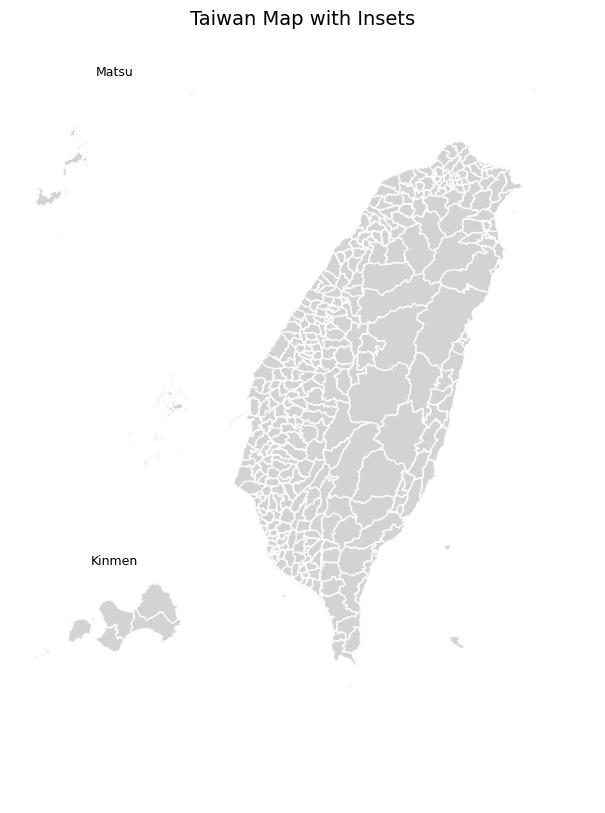

In [5]:
# town aspect

towns_clean = towns[~towns.geometry.apply(lambda g: is_dongsha(g) or is_taiping(g))]

mainland = towns_clean[~towns_clean["COUNTYNAME"].isin(["金門縣", "連江縣"])]

kinmen = towns_clean[towns_clean["COUNTYNAME"] == "金門縣"]
kinmen_focus = kinmen[kinmen["TOWNNAME"].isin(["金城鎮", "金沙鎮", "烈嶼鄉", "金寧鄉", "金湖鎮"])]

matsu = towns_clean[towns_clean["COUNTYNAME"] == "連江縣"]
matsu_focus = matsu[matsu["TOWNNAME"].isin(["北竿鄉", "南竿鄉"])]

fig, ax = plt.subplots(figsize=(8, 10))

mainland.plot(ax=ax, edgecolor="#fbfbfb", facecolor="lightgray")
ax.set_xlim(118.5, 122.5)
ax.set_ylim(21, 26)
ax.set_title("Taiwan Map with Insets", fontsize=14)
ax.axis("off")

ax_mz = inset_axes(ax, width="30%", height="30%", loc="upper left", borderpad=1.2)
matsu_focus.plot(ax=ax_mz, edgecolor="#fbfbfb", facecolor="lightgray")
ax_mz.set_title("Matsu", fontsize=9)
ax_mz.axis("off")

ax_km = inset_axes(ax, width="30%", height="30%", loc="lower left", borderpad=1.2)
kinmen_focus.plot(ax=ax_km, edgecolor="#fbfbfb", facecolor="lightgray")
ax_km.set_title("Kinmen", fontsize=9)
ax_km.axis("off")

plt.show()

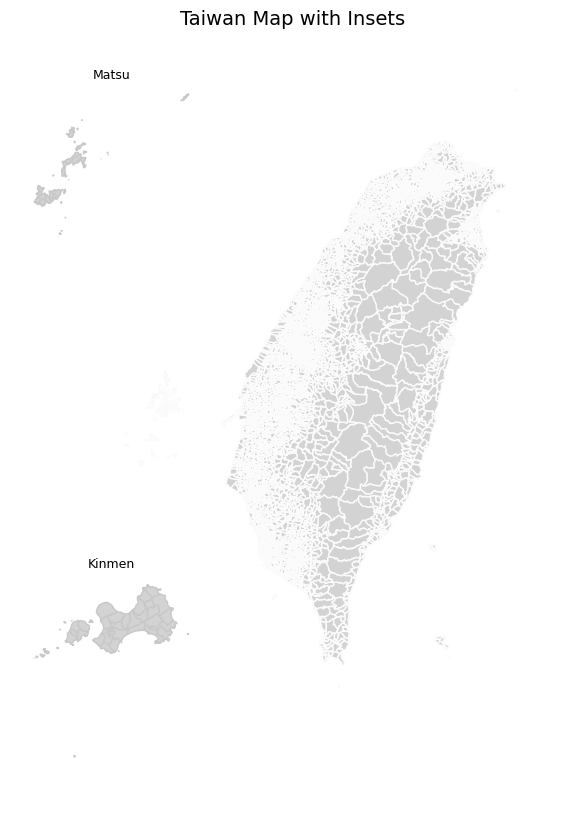

In [6]:
# village aspect

villages_clean = villages[~villages.geometry.apply(lambda g: is_dongsha(g) or is_taiping(g))]

mainland = villages_clean[~villages_clean["COUNTYNAME"].isin(["金門縣", "連江縣"])]

kinmen = villages_clean[villages_clean["COUNTYNAME"] == "金門縣"]
kinmen_focus = kinmen[kinmen["TOWNNAME"].isin(["金城鎮", "金沙鎮", "烈嶼鄉", "金寧鄉", "金湖鎮"])]

matsu = villages_clean[villages_clean["COUNTYNAME"] == "連江縣"]
matsu_focus = matsu[matsu["TOWNNAME"].isin(["北竿鄉", "南竿鄉"])]

fig, ax = plt.subplots(figsize=(8, 10))

mainland.plot(ax=ax, edgecolor="#fbfbfb", facecolor="lightgray")
ax.set_xlim(118.5, 122.5)
ax.set_ylim(21, 26)
ax.set_title("Taiwan Map with Insets", fontsize=14)
ax.axis("off")

ax_mz = inset_axes(ax, width="30%", height="30%", loc="upper left", borderpad=1.2)
matsu_focus.plot(ax=ax_mz, edgecolor="#c8c8c8", facecolor="lightgray")
ax_mz.set_title("Matsu", fontsize=9)
ax_mz.axis("off")

ax_km = inset_axes(ax, width="30%", height="30%", loc="lower left", borderpad=1.2)
kinmen_focus.plot(ax=ax_km, edgecolor="#c8c8c8", facecolor="lightgray")
ax_km.set_title("Kinmen", fontsize=9)
ax_km.axis("off")

plt.show()